In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap
import cftime as cf



In [2]:
load_from_scratch=True
plt.rcParams.update({
    # Use LaTeX default serif font-family.
    # https://matplotlib.org/stable/tutorials/text/usetex.html#sphx-glr-tutorials-text-usetex-py
     "font.family": "sans-serif",
     # Use specific cursive fonts.
     "font.cursive": ["Comic Neue", "Comic Sans MS"],
 })
font = {'fontname':'Comic Neue'}

In [3]:
# tracks = pd.read_csv('/user/home/al18709/work/ibtracks/ibtracs.ALL.list.v04r00.csv')

In [4]:
def find_dates(sids,model_cal):

	dates = sids.apply(lambda row : cf.datetime(calendar=model_cal,
									year=row.year,
									month=row.month,
									day=row.day,
									hour=row.hour
									), axis=1)
	return dates



In [5]:
def lookup(row,cal):
	# date = cf.datetime(calendar=cal,
	# 				year=row.year,
	# 				month=row.month,
	# 				day=row.day,
	# 				hour=row.hour
	# 				)
	if row.year not in range(2000,2015):
		return 0
	else:
		date = cf.datetime(calendar=cal,
						year=row.year,
						month=row.month,
						day=row.day,
						)

	# date = pd.to_datetime('year' : row.year, 'month' : row.month, 'day' = row.day)
	return date

def lookup_ibtracs(row,tracks):
	# tracks = pd.read_csv('/user/work/al18709/ibtracks/ibtracs.ALL.list.v04r00.csv',
	# 					usecols=['SID','LAT','LON','BASIN','NAME','SEASON', 'NATURE','ISO_TIME','USA_SSHS'],
	# 					parse_dates = ['ISO_TIME'],keep_default_na=False)
	boolean = (tracks.SID == row.sid) & (tracks.LAT == row.centre_lat) & (tracks.LON == row.centre_lon)
	time =  pd.to_datetime(tracks.loc[boolean].ISO_TIME)
	if list(time) == []:
		print('no',flush=True)
		date = cf.datetime(calendar='gregorian',
						year=1978,
						month=1,
						day=1,
						hour=0
						)
		return date
	else:
		time =  time.iloc[0]
		date = cf.datetime(calendar='gregorian',
						year=time.year,
						month=time.month,
						day=time.day,
						)
	return date

def find_dates_mswep(meta):
	dates = meta.apply(lookup, axis=1)
	return dates

def find_dates(meta,calendar):
	dates = meta.apply(lookup, cal = calendar, axis=1)
	return dates

def find_dates_ibtracs(meta):
	tracks = pd.read_csv('/user/work/al18709/ibtracks/ibtracs.ALL.list.v04r00.csv',
						usecols=['SID','LAT','LON','BASIN','NAME','SEASON', 'NATURE','ISO_TIME','USA_SSHS'],
						parse_dates = ['ISO_TIME'],keep_default_na=False)
	dates = meta.apply(lookup_ibtracs, tracks= tracks, axis=1)
	# dates = meta.apply(lookup_ibtracs, axis=1)
	return dates

In [6]:

# for i in range (len(meta)):

# 	row = meta.iloc[i]

# 	boolean = (tracks.SID == row.sid) & (tracks.LAT == row.centre_lat) & (tracks.LON == row.centre_lon)
# 	time =  pd.to_datetime(tracks.loc[boolean].ISO_TIME)

# 	print(time)

# 	if list(time) == []:
# 		print('hello')
# 		continue
# 	time =  time.iloc[0]
# 	print(time)
# 	date = cf.datetime(calendar='gregorian',
# 							year=time.year,
# 							month=time.month,
# 							day=time.day,
# 							hour=time.hour
# 	)
# 	print(date)

In [22]:
# load current 1D dataset
real,inputs,pred_scalar,meta = load_tc_data(set='validation',results='ke_tracks')
# tracks = pd.read_csv('/user/work/al18709/ibtracks/ibtracs.ALL.list.v04r00.csv',
# 						usecols=['SID','LAT','LON','BASIN','NAME','SEASON', 'NATURE','ISO_TIME','USA_SSHS'],
# 						parse_dates = ['ISO_TIME'],keep_default_na=False)
# print(lookup_ibtracs(meta.iloc[0],tracks))
# dates = find_dates_ibtracs(meta)
# print(dates)
# meta['date'] = dates
meta_scalar = pd.read_csv('/user/work/al18709/tc_data_mswep_40/scalar_wgan_valid_meta_with_dates.csv')

# # load ibtracks
# tracks = pd.read_csv('/user/work/al18709/ibtracks/ibtracs.ALL.list.v04r00.csv',
# 						usecols=['SID','LAT','LON','BASIN','NAME','SEASON', 'NATURE','ISO_TIME','USA_SSHS'],
# 						parse_dates = ['ISO_TIME'],keep_default_na=False)

# og_tracks_grouped = tracks.groupby('sid')

In [28]:
# # load original 2D WGAN
real_2,inputs_2,pred_2,meta_2,imput_og,pred_og,meta_og = load_tc_data(set='validation',results='kh_tracks')
# meta_2['date'] = find_dates_ibtracs(meta_2,'gregorian')
# meta_og['date'] = find_dates_ibtracs(meta_og,'gregorian')
real_og_x,_,_,_,_,_,pred_og_x,meta_og_x = load_tc_data(set='extreme_test',results='test')
# meta_og_x['date'] = find_dates_ibtracs(meta_og_x,'gregorian')
meta_og = pd.read_csv('/user/work/al18709/tc_data_mswep_40/valid_meta.csv')
meta_og = pd.read_csv('/user/work/al18709/tc_data_mswep_40/original_wgan_valid_meta_with_dates.csv')
# meta_og['date'] = find_dates_ibtracs(meta_og,'gregorian')
# meta_og = 
# meta_valid = pd.read_csv('/user/work/al18709/tc_data_flipped/valid_meta.csv')

In [10]:
# load imerg
imerg_rain = np.load('/user/home/al18709/work/CMIP6/IMERG-V07/storm_rain/storm_rain_NH.npy')
imerg_lats = np.load('/user/home/al18709/work/CMIP6/IMERG-V07/storm_rain/storm_lats_NH.npy')
imerg_lons = np.load('/user/home/al18709/work/CMIP6/IMERG-V07/storm_rain/storm_lons_NH.npy')
imerg_sids = pd.read_csv('/user/home/al18709/work/CMIP6/IMERG-V07/storm_rain/storm_sid_NH.csv')
print(imerg_sids.sid.shape)
meta_imerg = pd.DataFrame({'sid':imerg_sids.sid ,'centre_lat':imerg_lats[:,4], 'centre_lon':imerg_lons[:,4],'date':find_dates(imerg_sids,calendar='julian')})

(22142,)


In [11]:
# load MSWEP
# load mswep
mswep_rain = np.load('/user/home/al18709/work/CMIP6/MSWEP/storm_rain/storm_rain_NH.npy')
mswep_lats = np.load('/user/home/al18709/work/CMIP6/MSWEP/storm_rain/storm_lats_NH.npy')
mswep_lons = np.load('/user/home/al18709/work/CMIP6/MSWEP/storm_rain/storm_lons_NH.npy')
mswep_sids = pd.read_csv('/user/home/al18709/work/CMIP6/MSWEP/storm_rain/storm_sid_NH.csv')
print(mswep_sids.sid.shape)
meta_mswep = pd.DataFrame({'sid':mswep_sids.sid ,'centre_lat':mswep_lats[:,4], 'centre_lon':mswep_lons[:,4],'date':find_dates(mswep_sids,calendar='standard')})


(53183,)


In [12]:

# load HighResMIP CMCC-CM2-VHR4 historical NH
CMCC_hist_NH_rain = np.load('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/storm_rain/historical/storm_rain_NH.npy')
CMCC_hist_NH_lats = np.load('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/storm_rain/historical/storm_lats_NH.npy')
CMCC_hist_NH_lons = np.load('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/storm_rain/historical/storm_lons_NH.npy')
CMCC_hist_NH_sids = pd.read_csv('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/storm_rain/historical/storm_sid_NH.csv')
print(CMCC_hist_NH_sids.sid.shape)
meta_CMCC_hist_NH = pd.DataFrame({'sid':CMCC_hist_NH_sids.sid ,'centre_lat':CMCC_hist_NH_lats[:,4], 'centre_lon':CMCC_hist_NH_lons[:,4], 'date':find_dates(CMCC_hist_NH_sids,'365_day')})

# load HighResMIP CMCC-CM2-VHR4 historical SH
CMCC_hist_SH_rain = np.load('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/storm_rain/historical/storm_rain_SH.npy')
CMCC_hist_SH_lats = np.load('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/storm_rain/historical/storm_lats_SH.npy')
CMCC_hist_SH_lons = np.load('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/storm_rain/historical/storm_lons_SH.npy')
CMCC_hist_SH_sids = pd.read_csv('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/storm_rain/historical/storm_sid_SH.csv')
print(CMCC_hist_SH_sids.sid.shape)
meta_CMCC_hist_SH = pd.DataFrame({'sid':CMCC_hist_SH_sids.sid ,'centre_lat':CMCC_hist_SH_lats[:,4], 'centre_lon':CMCC_hist_SH_lons[:,4], 'date':find_dates(CMCC_hist_SH_sids,'365_day')})

# # load HighResMIP EC-EARTH-3P-HR  historical NH
# ecearthhr_hist_NH_rain = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/historical/storm_rain_NH.npy')
# ecearthhr_hist_NH_lats = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/historical/storm_lats_NH.npy')
# ecearthhr_hist_NH_lons = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/historical/storm_lons_NH.npy')
# ecearthhr_hist_NH_sids = pd.read_csv('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/historical/storm_sid_NH.csv')
# print(ecearthhr_hist_NH_sids.sid.shape)
# meta_ecearthhr_hist_NH = pd.DataFrame({'sid':ecearthhr_hist_NH_sids.sid ,'centre_lat':ecearthhr_hist_NH_lats[:,4], 'centre_lon':ecearthhr_hist_NH_lons[:,4], 'date':find_dates(ecearthhr_hist_NH_sids,'proleptic_gregorian')})

# # load HighResMIP EC-EARTH-3P-HR historical SH
# ecearthhr_hist_SH_rain = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/historical/storm_rain_SH.npy')
# ecearthhr_hist_SH_lats = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/historical/storm_lats_SH.npy')
# ecearthhr_hist_SH_lons = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/historical/storm_lons_SH.npy')
# ecearthhr_hist_SH_sids = pd.read_csv('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/historical/storm_sid_SH.csv')
# print(ecearthhr_hist_SH_sids.sid.shape)
# meta_ecearthhr_hist_SH = pd.DataFrame({'sid':ecearthhr_hist_SH_sids.sid ,'centre_lat':ecearthhr_hist_SH_lats[:,4], 'centre_lon':ecearthhr_hist_SH_lons[:,4], 'date':find_dates(ecearthhr_hist_SH_sids,'proleptic_gregorian')})

# load HighResMIP HadGEM3-GC31-HM   historical NH
hadgem_hist_NH_rain = np.load('/user/home/al18709/work/CMIP6/HighResMIP/HadGEM3-GC31-HM/storm_rain/historical/storm_rain_NH.npy')
hadgem_hist_NH_lats = np.load('/user/home/al18709/work/CMIP6/HighResMIP/HadGEM3-GC31-HM/storm_rain/historical/storm_lats_NH.npy')
hadgem_hist_NH_lons = np.load('/user/home/al18709/work/CMIP6/HighResMIP/HadGEM3-GC31-HM/storm_rain/historical/storm_lons_NH.npy')
hadgem_hist_NH_sids = pd.read_csv('/user/home/al18709/work/CMIP6/HighResMIP/HadGEM3-GC31-HM/storm_rain/historical/storm_sid_NH.csv')
print(hadgem_hist_NH_sids.sid.shape)
meta_hadgem_hist_NH = pd.DataFrame({'sid':hadgem_hist_NH_sids.sid ,'centre_lat':hadgem_hist_NH_lats[:,4], 'centre_lon':hadgem_hist_NH_lons[:,4],'date':find_dates(hadgem_hist_NH_sids,'360_day')})

# # load HighResMIP HadGEM3-GC31-HM  historical SH
hadgem_hist_SH_rain = np.load('/user/home/al18709/work/CMIP6/HighResMIP/HadGEM3-GC31-HM/storm_rain/historical/storm_rain_SH.npy')
hadgem_hist_SH_lats = np.load('/user/home/al18709/work/CMIP6/HighResMIP/HadGEM3-GC31-HM/storm_rain/historical/storm_lats_SH.npy')
hadgem_hist_SH_lons = np.load('/user/home/al18709/work/CMIP6/HighResMIP/HadGEM3-GC31-HM/storm_rain/historical/storm_lons_SH.npy')
hadgem_hist_SH_sids = pd.read_csv('/user/home/al18709/work/CMIP6/HighResMIP/HadGEM3-GC31-HM/storm_rain/historical/storm_sid_SH.csv')
print(hadgem_hist_SH_sids.sid.shape)
meta_hadgem_hist_SH = pd.DataFrame({'sid':hadgem_hist_SH_sids.sid ,'centre_lat':hadgem_hist_SH_lats[:,4], 'centre_lon':hadgem_hist_SH_lons[:,4], 'date':find_dates(hadgem_hist_SH_sids,'360_day')})


(5236,)
(2366,)
(852,)
(195,)


In [13]:

# load CMIP6 historical dataset 
miroc6_hist_rain = np.load('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/historical/storm_rain_NH.npy')
miroc6_hist_lats = np.load('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/historical/storm_lats_NH.npy')
miroc6_hist_lons = np.load('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/historical/storm_lons_NH.npy')
miroc6_hist_sids = pd.read_csv('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/historical/storm_sid_NH.csv')
meta_miroc6_hist = pd.DataFrame({'sid':miroc6_hist_sids.sid ,'centre_lat':miroc6_hist_lats[:,4], 'centre_lon':miroc6_hist_lons[:,4], 'date':find_dates(miroc6_hist_sids,'gregorian')})

miroc6_hist_rain_SH = np.load('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/historical/storm_rain_SH.npy')
miroc6_hist_lats_SH = np.load('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/historical/storm_lats_SH.npy')
miroc6_hist_lons_SH = np.load('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/historical/storm_lons_SH.npy')
miroc6_hist_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/historical/storm_sid_SH.csv')
meta_miroc6_hist_SH = pd.DataFrame({'sid':miroc6_hist_sids_SH.sid ,'centre_lat':miroc6_hist_lats_SH[:,4], 'centre_lon':miroc6_hist_lons_SH[:,4], 'date':find_dates(miroc6_hist_sids_SH,'gregorian')})

# CMIP6 MPI-ESM1-2-LR
mpi_hist_rain = np.load('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/historical/storm_rain_NH.npy')
mpi_hist_lats = np.load('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/historical/storm_lats_NH.npy')
mpi_hist_lons = np.load('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/historical/storm_lons_NH.npy')
mpi_hist_sids = pd.read_csv('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/historical/storm_sid_NH.csv')
meta_mpi_hist = pd.DataFrame({'sid':mpi_hist_sids.sid ,'centre_lat':mpi_hist_lats[:,4], 'centre_lon':mpi_hist_lons[:,4], 'date':find_dates(mpi_hist_sids,'proleptic_gregorian')})

mpi_hist_rain_SH = np.load('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/historical/storm_rain_SH.npy')
mpi_hist_lats_SH = np.load('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/historical/storm_lats_SH.npy')
mpi_hist_lons_SH = np.load('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/historical/storm_lons_SH.npy')
mpi_hist_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/historical/storm_sid_SH.csv')
meta_mpi_hist_SH = pd.DataFrame({'sid':mpi_hist_sids_SH.sid ,'centre_lat':mpi_hist_lats_SH[:,4], 'centre_lon':mpi_hist_lons_SH[:,4], 'date':find_dates(mpi_hist_sids_SH,'proleptic_gregorian')})

# CMIP6 Noresm
noresm_hist_rain = np.load('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/historical/storm_rain_NH.npy')
noresm_hist_lats = np.load('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/historical/storm_lats_NH.npy')
noresm_hist_lons = np.load('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/historical/storm_lons_NH.npy')
noresm_hist_sids = pd.read_csv('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/historical/storm_sid_NH.csv')
meta_noresm_hist = pd.DataFrame({'sid':noresm_hist_sids.sid ,'centre_lat':noresm_hist_lats[:,4], 'centre_lon':noresm_hist_lons[:,4], 'date':find_dates(noresm_hist_sids,'noleap')})

noresm_hist_rain_SH = np.load('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/historical/storm_rain_SH.npy')
noresm_hist_lats_SH = np.load('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/historical/storm_lats_SH.npy')
noresm_hist_lons_SH = np.load('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/historical/storm_lons_SH.npy')
noresm_hist_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/historical/storm_sid_SH.csv')
meta_noresm_hist_SH = pd.DataFrame({'sid':noresm_hist_sids_SH.sid ,'centre_lat':noresm_hist_lats_SH[:,4], 'centre_lon':noresm_hist_lons_SH[:,4], 'date':find_dates(noresm_hist_sids,'noleap')})

# CMIP6 IPSL
ipsl_hist_rain = np.load('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/historical/storm_rain_NH.npy')
ipsl_hist_lats = np.load('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/historical/storm_lats_NH.npy')
ipsl_hist_lons = np.load('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/historical/storm_lons_NH.npy')
ipsl_hist_sids = pd.read_csv('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/historical/storm_sid_NH.csv')
meta_ipsl_hist = pd.DataFrame({'sid':ipsl_hist_sids.sid ,'centre_lat':ipsl_hist_lats[:,4], 'centre_lon':ipsl_hist_lons[:,4], 'date':find_dates(ipsl_hist_sids,'gregorian')})

ipsl_hist_rain_SH = np.load('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/historical/storm_rain_SH.npy')
ipsl_hist_lats_SH = np.load('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/historical/storm_lats_SH.npy')
ipsl_hist_lons_SH = np.load('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/historical/storm_lons_SH.npy')
ipsl_hist_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/historical/storm_sid_SH.csv')
meta_ipsl_hist_SH = pd.DataFrame({'sid':ipsl_hist_sids_SH.sid ,'centre_lat':ipsl_hist_lats_SH[:,4], 'centre_lon':ipsl_hist_lons_SH[:,4], 'date':find_dates(ipsl_hist_sids_SH,'gregorian')})

# CMIP6 mri
mri_hist_rain = np.load('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/historical/storm_rain_NH.npy')
mri_hist_lats = np.load('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/historical/storm_lats_NH.npy')
mri_hist_lons = np.load('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/historical/storm_lons_NH.npy')
mri_hist_sids = pd.read_csv('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/historical/storm_sid_NH.csv')
meta_mri_hist = pd.DataFrame({'sid':mri_hist_sids.sid ,'centre_lat':mri_hist_lats[:,4], 'centre_lon':mri_hist_lons[:,4], 'date':find_dates(mri_hist_sids,'proleptic_gregorian')})

mri_hist_rain_SH = np.load('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/historical/storm_rain_SH.npy')
mri_hist_lats_SH = np.load('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/historical/storm_lats_SH.npy')
mri_hist_lons_SH = np.load('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/historical/storm_lons_SH.npy')
mri_hist_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/historical/storm_sid_SH.csv')
meta_mri_hist_SH = pd.DataFrame({'sid':mri_hist_sids_SH.sid ,'centre_lat':mri_hist_lats_SH[:,4], 'centre_lon':mri_hist_lons_SH[:,4], 'date':find_dates(mri_hist_sids_SH,'proleptic_gregorian')})

# CMIP6 EC-Earth
ecearth_hist_rain = np.load('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/historical/storm_rain_NH.npy')
ecearth_hist_lats = np.load('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/historical/storm_lats_NH.npy')
ecearth_hist_lons = np.load('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/historical/storm_lons_NH.npy')
ecearth_hist_sids = pd.read_csv('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/historical/storm_sid_NH.csv')
meta_ecearth_hist = pd.DataFrame({'sid':ecearth_hist_sids.sid ,'centre_lat':ecearth_hist_lats[:,4], 'centre_lon':ecearth_hist_lons[:,4], 'date':find_dates(ecearth_hist_sids,'proleptic_gregorian')})

ecearth_hist_rain_SH = np.load('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/historical/storm_rain_SH.npy')
ecearth_hist_lats_SH = np.load('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/historical/storm_lats_SH.npy')
ecearth_hist_lons_SH = np.load('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/historical/storm_lons_SH.npy')
ecearth_hist_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/historical/storm_sid_SH.csv')
meta_ecearth_hist_SH = pd.DataFrame({'sid':ecearth_hist_sids_SH.sid ,'centre_lat':ecearth_hist_lats_SH[:,4], 'centre_lon':ecearth_hist_lons_SH[:,4], 'date':find_dates(ecearth_hist_sids,'proleptic_gregorian')})




In [14]:
print(meta_CMCC_hist_NH)

def calc_nyears(meta):
	nyears = int(meta.year[len(meta.year)-1] - meta.year[0] + 1)
	return nyears




                                           sid  centre_lat  centre_lon  \
0     TC_CMCC-CM2-VHR4_historical_1979_NH_2385        8.25      112.65   
1     TC_CMCC-CM2-VHR4_historical_1979_NH_2388       17.95      120.25   
2     TC_CMCC-CM2-VHR4_historical_1979_NH_2388       19.25      121.05   
3     TC_CMCC-CM2-VHR4_historical_1979_NH_2388       21.25      122.15   
4     TC_CMCC-CM2-VHR4_historical_1979_NH_2388       23.75      123.45   
...                                        ...         ...         ...   
5231  TC_CMCC-CM2-VHR4_historical_2014_NH_5312       14.15      127.75   
5232  TC_CMCC-CM2-VHR4_historical_2014_NH_5312       14.95      128.35   
5233  TC_CMCC-CM2-VHR4_historical_2014_NH_5312       56.15     -157.15   
5234  TC_CMCC-CM2-VHR4_historical_2014_NH_5312       59.35     -155.15   
5235  TC_CMCC-CM2-VHR4_historical_2014_NH_5321       33.75      161.45   

                     date  
0                       0  
1                       0  
2                       0  

In [15]:
# CMIP6 CMCC_LR
cmcclr_hist_rain = np.load('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/historical/storm_rain_NH.npy')
cmcclr_hist_lats = np.load('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/historical/storm_lats_NH.npy')
cmcclr_hist_lons = np.load('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/historical/storm_lons_NH.npy')
cmcclr_hist_sids = pd.read_csv('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/historical/storm_sid_NH.csv')
meta_cmcclr_hist = pd.DataFrame({'sid':cmcclr_hist_sids.sid ,'centre_lat':cmcclr_hist_lats[:,4], 'centre_lon':cmcclr_hist_lons[:,4], 'date':find_dates(cmcclr_hist_sids,'365_day')})

cmcclr_hist_rain_SH = np.load('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/historical/storm_rain_SH.npy')
cmcclr_hist_lats_SH = np.load('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/historical/storm_lats_SH.npy')
cmcclr_hist_lons_SH = np.load('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/historical/storm_lons_SH.npy')
cmcclr_hist_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/historical/storm_sid_SH.csv')
meta_cmcclr_hist_SH = pd.DataFrame({'sid':cmcclr_hist_sids_SH.sid ,'centre_lat':cmcclr_hist_lats_SH[:,4], 'centre_lon':cmcclr_hist_lons_SH[:,4], 'date':find_dates(cmcclr_hist_sids_SH,'365_day')})

# CMIP6 NESM3
nesm_hist_rain = np.load('/user/home/al18709/work/CMIP6/NESM3/storm_rain/historical/storm_rain_NH.npy')
nesm_hist_lats = np.load('/user/home/al18709/work/CMIP6/NESM3/storm_rain/historical/storm_lats_NH.npy')
nesm_hist_lons = np.load('/user/home/al18709/work/CMIP6/NESM3/storm_rain/historical/storm_lons_NH.npy')
nesm_hist_sids = pd.read_csv('/user/home/al18709/work/CMIP6/NESM3/storm_rain/historical/storm_sid_NH.csv')
meta_nesm_hist = pd.DataFrame({'sid':nesm_hist_sids.sid ,'centre_lat':nesm_hist_lats[:,4], 'centre_lon':nesm_hist_lons[:,4], 'date':find_dates(nesm_hist_sids,'standard')})

nesm_hist_rain_SH = np.load('/user/home/al18709/work/CMIP6/NESM3/storm_rain/historical/storm_rain_SH.npy')
nesm_hist_lats_SH = np.load('/user/home/al18709/work/CMIP6/NESM3/storm_rain/historical/storm_lats_SH.npy')
nesm_hist_lons_SH = np.load('/user/home/al18709/work/CMIP6/NESM3/storm_rain/historical/storm_lons_SH.npy')
nesm_hist_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/NESM3/storm_rain/historical/storm_sid_SH.csv')
meta_nesm_hist_SH = pd.DataFrame({'sid':nesm_hist_sids_SH.sid ,'centre_lat':nesm_hist_lats_SH[:,4], 'centre_lon':nesm_hist_lons_SH[:,4], 'date':find_dates(nesm_hist_sids_SH,'standard')})

# load trmm
# trmm_rain = np.load('/user/home/al18709/work/CMIP6/TRMM/storm_rain/storm_rain_NH.npy')
# trmm_lats = np.load('/user/home/al18709/work/CMIP6/TRMM/storm_rain/storm_lats_NH.npy')
# trmm_lons = np.load('/user/home/al18709/work/CMIP6/TRMM/storm_rain/storm_lons_NH.npy')
# trmm_sids = pd.read_csv('/user/home/al18709/work/CMIP6/TRMM/storm_rain/storm_sid_NH.csv')
# print(imerg_sids.sid.shape)
# meta_trmm = pd.DataFrame({'sid':trmm_sids.sid ,'centre_lat':trmm_lats[:,4], 'centre_lon':trmm_lons[:,4], 'hour':trmm_sids.hour, 'year':trmm_sids.year})

# trmm_rain_SH = np.load('/user/home/al18709/work/CMIP6/TRMM/storm_rain/storm_rain_SH.npy')
# trmm_lats_SH = np.load('/user/home/al18709/work/CMIP6/TRMM/storm_rain/storm_lats_SH.npy')
# trmm_lons_SH = np.load('/user/home/al18709/work/CMIP6/TRMM/storm_rain/storm_lons_SH.npy')
# trmm_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/TRMM/storm_rain/storm_sid_SH.csv')
# print(trmm_sids.sid.shape)
# meta_trmm_SH = pd.DataFrame({'sid':trmm_sids.sid ,'centre_lat':trmm_lats[:,4], 'centre_lon':trmm_lons[:,4], 'hour':trmm_sids.hour})

In [16]:
# load dataset
# load data
def generate_annual_frequency(meta,rain,units_converter):
	
	# get subset of storms
	# dates = meta.date
	boolean = meta.date != 0
	print(meta.date)

	meta = meta.loc[boolean]
	rain = rain[boolean ,:,:,:]
	new_boolean = np.mean(rain,axis=(1,2,3)) != 0
	print('bool',new_boolean.shape)
	meta = meta.loc[new_boolean]
	rain = rain[new_boolean,:,:,:]
	# dates_unique=dates.drop_duplicates()
	# ndates = len(dates_unique)
	print('number of timepoints = ', meta.shape)
	sids = meta.sid
	sids_unique = sids.drop_duplicates()
	# nsids = len(sids_unique)
	# meta.date = pd.to_datetime(meta.date)
	tracks_grouped = meta.groupby(meta.sid)
	# tracks_grouped = meta.groupby(pd.Grouper(freq='M'))
	# tracks_grouped = meta.resample(rule='M', on='date')
	print(tracks_grouped)
	# total_rain = np.zeros((ndates,100,100))
	# total_rain = np.zeros((ndates))
	# i=0
	# drop_idx=[]
	# south_idx=[]
	# north_idx=[]
	daily_rains = []
	# daily_dates = []
	
	# find time frequency
	print('sids unique',sids_unique.shape)
	# for sid in sids_unique:
	# 	print(sid)
	# 	# date_for_rain = tracks_grouped.get_group(date)
	# 	rain_sid = tracks_grouped.get_group(sid)

	# 	track_dates = rain_sid.date
	# 	for track_date in track_dates:
	# 		track_daily_rain = np.sum(rain[track_dates.index,:,:,0],axis=0)*units_converter
	# 		mean_track_daily_rain = np.mean(track_daily_rain)

	# 		daily_rains.append(mean_track_daily_rain)
	# 		daily_dates.append(track_date)

	for sample in rain:
		# print(sample.shape)
		# date_for_rain = tracks_grouped.get_group(date)

		track_daily_rain = np.mean(sample)*units_converter # for cmip this is 24, for imerg it should be 8
		# they multiplied by 4 i think
		# mean_track_daily_rain = np.mean(track_daily_rain)

		daily_rains.append(track_daily_rain)
		# daily_dates.append(track_date)


		# storm_rain = rain[rain_sid.index,:,:,0]
		# print('storm_rain shape',storm_rain.shape)

		# imerg is mm/hr sampled based on ibtracs which is 3 hourly positions
		units_converter_imerg = 3

		# mswep is total rain mm/3hr sampled based on ibtracs which is 3 hourly positions interpolated from 6 hourly
		units_converter_mswep = 1

		# cmip is mm/6hr sampled every 6 hours
		units_converter_cmip = 4


		
		# total_daily_rain = np.mean(storm_rain,axis=0)*units_converter
		
		

		# total_rain[i,:,:] = total_daily_rain
		# print('shape of total_daily_rain sum',np.mean(total_daily_rain))
		# total_rain[i] = np.mean(total_daily_rain)
		# i=i+1

	
	# # get nh and sh datasets
	# composite_storm_rain_nh = composite_storm_rain[north_idx,:,:]
	# composite_storm_rain_sh = composite_storm_rain[south_idx,:,:]
	x = np.arange(-5, 300, 5)
	y = np.histogram(daily_rains,bins = x)[0]

	print(y)
	window_size = 5
	smoothed_frequencies = np.convolve(y, np.ones(window_size) / window_size, mode='same')
	y = smoothed_frequencies
	y[0] = 1
	# y[y==0] = 1
	return y,x[1:]




In [17]:
# print(np.sum(np.sum(imerg_rain,axis=(1,2))== 0))
# print(np.sum(np.sum(mswep_rain,axis=(1,2))== 0))
# print(mswep_rain.shape)
# print(imerg_rain.shape)
# print(mswep_rain)
# print(np.max(mswep_rain[mswep_rain != 0]))
print(np.max(imerg_rain[np.sum(imerg_rain,axis=(1,2)) != 0]))
print(np.max(mswep_rain[np.sum(mswep_rain,axis=(1,2)) != 0]))
print(np.max(CMCC_hist_SH_rain))
print(np.max(miroc6_hist_rain))
print(np.max(miroc6_hist_rain_SH))
print(np.max(mpi_hist_rain))
print(np.max(mpi_hist_rain_SH))
# print(generate_annual_frequency(meta_mswep,np.expand_dims(mswep_rain,axis=-1),8))
# print(generate_annual_frequency(meta_imerg,np.expand_dims(imerg_rain,axis=-1),8))
# print(generate_annual_frequency(meta_CMCC_hist_NH,np.expand_dims(CMCC_hist_NH_rain,axis=-1),24))

206.70579528808594
698.125
551.7941504716873
168.0450551211834
161.73912473022938
59.3879297375679
38.85866571217775


In [18]:
print(meta_hadgem_hist_NH)

                                            sid  centre_lat  centre_lon  \
0    TC_HadGEM3-GC31-HM_historical_1979_NH_3296       18.95      140.45   
1    TC_HadGEM3-GC31-HM_historical_1979_NH_3296       19.45      140.45   
2    TC_HadGEM3-GC31-HM_historical_1979_NH_3296       20.35      140.75   
3    TC_HadGEM3-GC31-HM_historical_1979_NH_3348        7.05      140.75   
4    TC_HadGEM3-GC31-HM_historical_1979_NH_3348        5.85      126.05   
..                                          ...         ...         ...   
847  TC_HadGEM3-GC31-HM_historical_2014_NH_7354       33.25      -70.85   
848  TC_HadGEM3-GC31-HM_historical_2014_NH_7354       37.05      -68.05   
849  TC_HadGEM3-GC31-HM_historical_2014_NH_7361       19.65      121.75   
850  TC_HadGEM3-GC31-HM_historical_2014_NH_7361       20.15      122.15   
851  TC_HadGEM3-GC31-HM_historical_2014_NH_7361       22.95      122.15   

                    date  
0                      0  
1                      0  
2                 

In [19]:
print(meta_imerg.date)

0        2000-06-20 00:00:00
1        2000-06-20 00:00:00
2        2000-06-20 00:00:00
3        2000-06-20 00:00:00
4        2000-06-20 00:00:00
                ...         
22137                      0
22138                      0
22139                      0
22140                      0
22141                      0
Name: date, Length: 22142, dtype: object


In [20]:
print(meta_imerg.shape)
print(meta_mswep.shape)

boolean = meta_imerg.date != 0
meta = meta_imerg.loc[boolean]

print(meta.shape)

boolean = meta_mswep.date != 0
meta = meta_mswep.loc[boolean]

print(meta.shape)

print(meta)

(22142, 4)
(53183, 4)
(14553, 4)
(18121, 4)
                 sid  centre_lat  centre_lon                 date
27433  2000003S13082  -20.450001   70.150009  2000-01-08 00:00:00
27434  2000003S13082  -20.750004   69.450012  2000-01-08 00:00:00
27435  2000003S13082  -21.049999   68.750000  2000-01-08 00:00:00
27436  2000003S13082  -21.250004   68.050003  2000-01-08 00:00:00
27437  2000003S13082  -21.350002   67.350006  2000-01-08 00:00:00
...              ...         ...         ...                  ...
45549  2014356S08101  -23.250004   83.949997  2014-12-30 00:00:00
45550  2014356S08101  -23.549999   83.550003  2014-12-30 00:00:00
45551  2014356S08101  -23.850002   83.250015  2014-12-31 00:00:00
45552  2014356S08101  -24.250004   82.949997  2014-12-31 00:00:00
45553  2014356S08101  -24.549999   82.449997  2014-12-31 00:00:00

[18121 rows x 4 columns]


In [29]:
# Obs and WGAN
# total_rain,dates = generate_annual_frequency(meta,real,1)
# total_rain_x,dates_x = generate_annual_frequency(meta_og_x,np.expand_dims(real_og_x,axis=-1),1)
total_rain_wgan,dates_wgan = generate_annual_frequency(meta_scalar,pred_scalar,8)
total_rain_wgan_og,dates_wgan_og = generate_annual_frequency(meta_og,pred_og,8)
# total_rain_og,dates_og = generate_annual_frequency(meta_og,pred_og,1)
# total_rain_og_x,dates_og_x = generate_annual_frequency(meta_og_x,pred_og_x,1)

# imerg
# set imerg=True?
# i don't think we need to multiply rain by 3 hours maybe? because its rain rate over the hour so we assume it rains at the same rate for 3 or 6 hours depending on the track?
# I think the storm track is handling the fact its rain rate and not accumulated rainfall here.
# imerg_total_rain,imerg_dates = generate_annual_frequency(meta_imerg,np.expand_dims(imerg_rain,axis=-1),3)
# nyears_imerg = calc_nyears(meta_imerg)
total_rain_imerg,dates_imerg = generate_annual_frequency(meta_imerg,np.expand_dims(imerg_rain,axis=-1),24) # this might be 24 not 8

total_rain_mswep,dates_mswep = generate_annual_frequency(meta_mswep,np.expand_dims(mswep_rain,axis=-1),8)


# because rain was originally in precip flux, converted to mm/6hr with rain_data = rain_data * 86400/4 
# so multiply by 4 to get mm/day
cmip_converter = 4
# trmm
# composite_trmm_NH,composite_trmm_SH,nstorms_trmm_nh,nstorms_trmm_sh = generate_annual_frequency(meta_trmm,np.expand_dims(trmm_rain,axis=-1),ibtracks=og_tracks_grouped)
# nyears_trmm = calc_nyears(meta_trmm)

# HighResMIP
total_rain_CMCC_nh,dates_CMCC_nh = generate_annual_frequency(meta_CMCC_hist_NH,np.expand_dims(CMCC_hist_NH_rain,axis=-1),cmip_converter)
# nyears_CMCC_hist_NH = calc_nyears(meta_CMCC_hist_NH)
total_rain_CMCC_sh,dates_CMCC_sh = generate_annual_frequency(meta_CMCC_hist_SH,np.expand_dims(CMCC_hist_SH_rain,axis=-1),cmip_converter)
# nyears_CMCC_hist_SH = calc_nyears(meta_CMCC_hist_SH)

# total_rain_ecearthhr_nh,dates_exearthhr_nh = generate_annual_frequency(meta_ecearthhr_hist_NH,np.expand_dims(ecearthhr_hist_NH_rain,axis=-1),cmip_converter)
# nyears_ecearthhr_hist_NH = calc_nyears(meta_ecearthhr_hist_NH)
# total_rain_ecearthhr_sh,dates_ecearthhr_sh = generate_annual_frequency(meta_ecearthhr_hist_SH,np.expand_dims(ecearthhr_hist_SH_rain,axis=-1),cmip_converter)
# nyears_ecearthhr_hist_SH = calc_nyears(meta_ecearthhr_hist_SH)

total_rain_hadgem_nh,dates_hadgem_nh = generate_annual_frequency(meta_hadgem_hist_NH,np.expand_dims(hadgem_hist_NH_rain,axis=-1),cmip_converter)
# nyears_hadgem_hist_NH = calc_nyears(meta_hadgem_hist_NH)
total_rain_hadgem_sh,dates_hadgem_sh = generate_annual_frequency(meta_hadgem_hist_SH,np.expand_dims(hadgem_hist_SH_rain,axis=-1),cmip_converter)
# nyears_ecearthhr_hist_SH = calc_nyears(meta_ecearthhr_hist_SH)


# CMIP6
total_rain_miroc6_nh,dates_miroc6_nh = generate_annual_frequency(meta_miroc6_hist,np.expand_dims(miroc6_hist_rain,axis=-1),cmip_converter)
# nyears_miroc6_hist_nh = calc_nyears(meta_miroc6_hist)
total_rain_miroc6_sh,dates_miroc6_sh = generate_annual_frequency(meta_miroc6_hist_SH,np.expand_dims(miroc6_hist_rain_SH,axis=-1),cmip_converter)
# nyears_miroc6_hist_sh = calc_nyears(meta_miroc6_hist_SH)

total_rain_mpi_nh,dates_mpi_nh = generate_annual_frequency(meta_mpi_hist,np.expand_dims(mpi_hist_rain,axis=-1),cmip_converter)
# nyears_mpi_hist_nh = calc_nyears(meta_mpi_hist)
total_rain_mpi_sh,dates_mpi_sh = generate_annual_frequency(meta_mpi_hist_SH,np.expand_dims(mpi_hist_rain_SH,axis=-1),cmip_converter)
# nyears_mpi_hist_sh = calc_nyears(meta_mpi_hist_SH)

total_rain_noresm_nh,dates_noresm_nh = generate_annual_frequency(meta_noresm_hist,np.expand_dims(noresm_hist_rain,axis=-1),cmip_converter)
# nyears_noresm_hist_nh = calc_nyears(meta_noresm_hist)
total_rain_noresm_nh,dates_noresm_nh = generate_annual_frequency(meta_noresm_hist_SH,np.expand_dims(noresm_hist_rain_SH,axis=-1),cmip_converter)
# nyears_noresm_hist_sh = calc_nyears(meta_noresm_hist_SH)

total_rain_nesm_nh,dates_nesm_nh = generate_annual_frequency(meta_nesm_hist,np.expand_dims(nesm_hist_rain,axis=-1),cmip_converter)
# nyears_nesm_hist_nh = calc_nyears(meta_nesm_hist)
total_rain_nesm_sh,dates_nesm_sh = generate_annual_frequency(meta_nesm_hist_SH,np.expand_dims(nesm_hist_rain_SH,axis=-1),cmip_converter)
# nyears_nesm_hist_sh = calc_nyears(meta_nesm_hist_SH)

total_rain_ipsl_nh,dates_ipsl_nh = generate_annual_frequency(meta_ipsl_hist,np.expand_dims(ipsl_hist_rain,axis=-1),cmip_converter)
# nyears_ipsl_hist_nh = calc_nyears(meta_ipsl_hist)
total_rain_ipsl_sh,dates_ipsl_sh = generate_annual_frequency(meta_ipsl_hist_SH,np.expand_dims(ipsl_hist_rain_SH,axis=-1),cmip_converter)
# nyears_ipsl_hist_sh = calc_nyears(meta_ipsl_hist_SH)

total_rain_mri_nh,dates_mri_nh = generate_annual_frequency(meta_mri_hist,np.expand_dims(mri_hist_rain,axis=-1),cmip_converter)
# nyears_mri_hist_nh = calc_nyears(meta_mri_hist)
total_rain_mri_sh,dates_mri_sh  = generate_annual_frequency(meta_mri_hist_SH,np.expand_dims(mri_hist_rain_SH,axis=-1),cmip_converter)
# nyears_mri_hist_sh = calc_nyears(meta_mri_hist_SH)

total_rain_ecearth_nh,dates_ecearth_nh = generate_annual_frequency(meta_ecearth_hist,np.expand_dims(ecearth_hist_rain,axis=-1),cmip_converter)
# nyears_ecearth_hist_nh = calc_nyears(meta_ecearth_hist)
total_rain_ecearth_sh,dates_ecearth_sh = generate_annual_frequency(meta_ecearth_hist_SH,np.expand_dims(ecearth_hist_rain_SH,axis=-1),cmip_converter)
# nyears_ecearth_hist_sh = calc_nyears(meta_ecearth_hist_SH)

total_rain_cmcclr_nh,dates_cmcclr_nh = generate_annual_frequency(meta_cmcclr_hist,np.expand_dims(cmcclr_hist_rain,axis=-1),cmip_converter)
# nyears_cmcclr_hist_nh = calc_nyears(meta_cmcclr_hist)
total_rain_cmcclr_sh,dates_cmcclr_sh = generate_annual_frequency(meta_cmcclr_hist_SH,np.expand_dims(cmcclr_hist_rain_SH,axis=-1),cmip_converter)
# nyears_cmcclr_hist_sh = calc_nyears(meta_cmcclr_hist_SH)

0        1979-01-11 00:00:00
1        1979-01-10 21:00:00
2        1979-01-10 18:00:00
3        1979-01-10 15:00:00
4        1979-01-09 00:00:00
                ...         
15925    2020-10-25 15:00:00
15926    2020-10-25 18:00:00
15927    2020-10-25 21:00:00
15928    2020-10-26 00:00:00
15929    2020-10-26 03:00:00
Name: date, Length: 15930, dtype: object
bool (15930,)
number of timepoints =  (15930, 6)
sids unique (332,)
[   0  390 1616 2426 3112 3066 2451 1575  738  295  121   54   36   21
    9    7    6    4    3    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
0        1986-09-12 12:00:00
1        1986-09-13 12:00:00
2        1986-09-17 12:00:00
3        1986-09-18 12:00:00
4        1986-09-11 15:00:00
                ...         
16248    2007-02-03 09:00:00
16249    2007-02-04 09:00:00
16250    2007-02-06 09:00:00
16251

In [24]:
print(len(total_rain_miroc6_sh))
print(len(dates_miroc6_sh))
print(total_rain_miroc6_sh)
print(dates_miroc6_sh)
print(total_rain_miroc6_sh[1])
print(dates_miroc6_sh[1])
# print(total_rain_imerg)

# print(total_rain_ecearth_nh.shape,dates_ecearth_nh.shape)

60
60
[  1.   36.8  55.6  85.8 112.  144.4 160.2 168.6 161.6 146.  117.6  90.
  67.   46.   29.8  16.    8.    3.8   1.6   0.4   0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295]
36.800000000000004
5


In [25]:
# calculate number of storms for sh / nh weight ratio for final plot
# nstorms_cmip6_hist_nh = nstorms_miroc6_hist_nh + nstorms_mpi_hist_nh + nstorms_noresm_hist_nh + nstorms_nesm_hist_nh + nstorms_ipsl_hist_nh + nstorms_mri_hist_nh + nstorms_ecearth_hist_nh + nstorms_cmcclr_hist_nh
# nstorms_cmip6_hist_sh = nstorms_miroc6_hist_sh + nstorms_mpi_hist_sh + nstorms_noresm_hist_sh + nstorms_nesm_hist_sh + nstorms_ipsl_hist_sh + nstorms_mri_hist_sh + nstorms_ecearth_hist_sh + nstorms_cmcclr_hist_sh

# nstorms_hrmip_hist_nh = nstorms_CMCC_hist_nh + nstorms_ecearthhr_hist_nh
# nstorms_hrmip_hist_sh = nstorms_CMCC_hist_sh + nstorms_ecearthhr_hist_sh

# print(nstorms_cmip6_hist_nh)
# print(nstorms_cmip6_hist_sh)
# print(nstorms_cmip6_hist_sh + nstorms_cmip6_hist_nh)
# print(nstorms_cmip6_hist_nh / (nstorms_cmip6_hist_sh + nstorms_cmip6_hist_nh))
# print(nstorms_cmip6_hist_sh / (nstorms_cmip6_hist_sh + nstorms_cmip6_hist_nh))

# nstorms_cmip6_ssp585_nh = nstorms_miroc6_ssp585_nh + nstorms_mpi_ssp585_nh + nstorms_noresm_ssp585_nh + nstorms_nesm_ssp585_nh + nstorms_ipsl_ssp585_nh + nstorms_mri_ssp585_nh + nstorms_ecearth_ssp585_nh + nstorms_cmcclr_ssp585_nh
# nstorms_cmip6_ssp585_sh = nstorms_miroc6_ssp585_sh + nstorms_mpi_ssp585_sh + nstorms_noresm_ssp585_sh + nstorms_nesm_ssp585_sh + nstorms_ipsl_ssp585_sh + nstorms_mri_ssp585_sh + nstorms_ecearth_ssp585_sh + nstorms_cmcclr_ssp585_sh

In [26]:
# define cmap
precip_cmap,precip_norm = make_cmap()

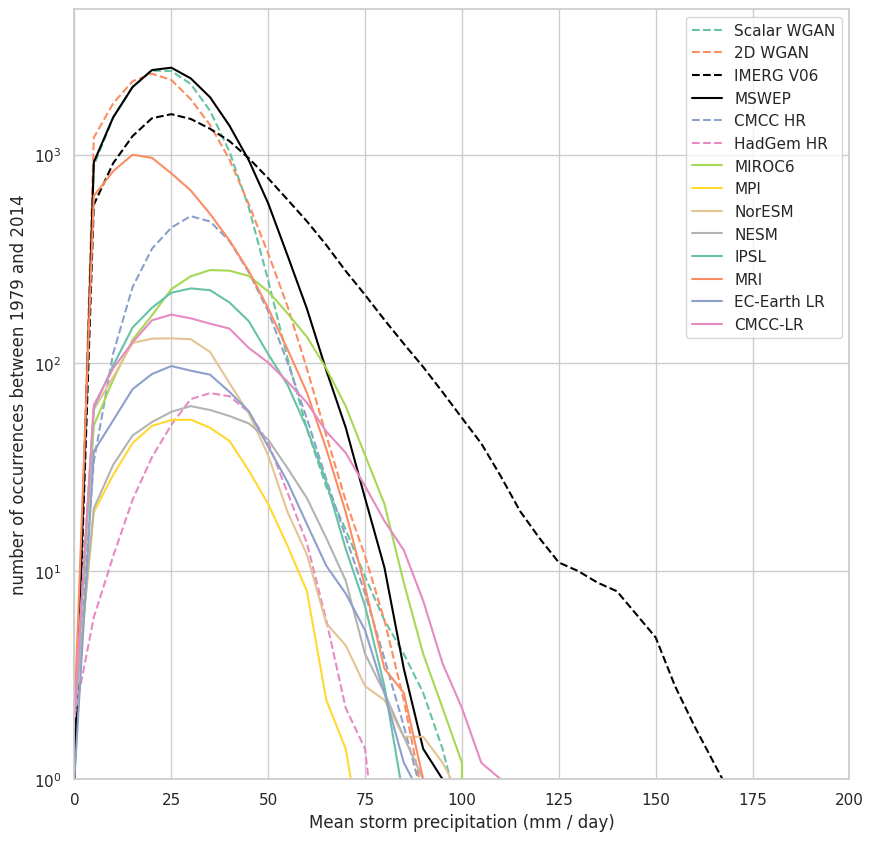

In [31]:

fig,axes = plt.subplots(1,1,figsize=(10, 10))
sns.set(style="whitegrid")
sns.set_palette("Set2")

plt.plot(dates_wgan,total_rain_wgan,linestyle='dashed')
plt.plot(dates_wgan_og,total_rain_wgan_og,linestyle='dashed')

# MSWEP Obs
# im_1 = axes[0,0].plot(total_rain_nh)
# axes[0,0].annotate('Max: %.1f' % np.max(total_rain_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[0,0].annotate('Storms: %.0f' % nstorms_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# # axes[0,0].annotate('Storms per year: %.0f' % (int(nstorms_nh) / nyea), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# im_2 = axes[0,1].plot(total_rain_sh)
# axes[0,1].annotate('Max: %.1f' % np.max(total_rain_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[0,1].annotate('Storms: %.0f' % nstorms_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# im_3 = axes[0,2].plot(total_rain_nh_x)
# axes[0,2].annotate('Max: %.1f' % np.max(total_rain_nh_x), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[0,2].annotate('Storms: %.0f' % nstorms_x_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# im_4 = axes[0,3].plot(total_rain_sh_x)
# axes[0,3].annotate('Max: %.1f' % np.max(total_rain_sh_x), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[0,3].annotate('Storms: %.0f' % nstorms_x_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# IMERG Obs
plt.plot(dates_imerg,total_rain_imerg,color='black',linestyle='dashed')
plt.plot(dates_mswep,total_rain_mswep,color='black')
# axes[1,0].annotate('Max: %.1f' % np.max(total_rain_imerg_NH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_6 = axes[1,1].plot(total_rain_imerg_SH)
# axes[1,1].annotate('Max: %.1f' % np.max(total_rain_imerg_SH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')

# im_5b = axes[1,2].plot(imerg_NH)
# axes[1,2].annotate('Max: %.1f' % np.max(imerg_NH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_6b = axes[1,3].plot(imerg_SH)
# axes[1,3].annotate('Max: %.1f' % np.max(imerg_SH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')

# # TRMM Obs
# im_5 = axes[1,2].plot(total_rain_trmm_NH)
# axes[1,2].annotate('Max: %.1f' % np.max(total_rain_trmm_NH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_6 = axes[1,3].plot(total_rain_trmm_SH)
# axes[1,3].annotate('Max: %.1f' % np.max(total_rain_trmm_SH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')

# im_5b = axes[1,2].plot(imerg_NH)
# axes[1,2].annotate('Max: %.1f' % np.max(imerg_NH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_6b = axes[1,3].plot(imerg_SH)
# axes[1,3].annotate('Max: %.1f' % np.max(imerg_SH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')

# HighresMIP
im = axes.plot(dates_CMCC_nh,total_rain_CMCC_nh+total_rain_CMCC_sh,linestyle='dashed')
# axes.plot(dates_CMCC_sh,total_rain_CMCC_sh)

axes.plot(dates_hadgem_nh,total_rain_hadgem_nh + total_rain_hadgem_sh,linestyle='dashed')
# axes.plot(dates_ecearth_nh,total_rain_ecearthhr_nh)
# axes.plot(dates_ecearth_sh,total_rain_ecearthhr_sh)

# CMIP6 hist
axes.plot(dates_miroc6_nh, total_rain_miroc6_nh + total_rain_miroc6_sh)
# axes.plot(dates_miroc6_sh, total_rain_miroc6_sh)

axes.plot(dates_mpi_nh, total_rain_mpi_nh + total_rain_mpi_sh)
# axes.plot(dates_mpi_sh,total_rain_mpi_sh)

axes.plot(dates_noresm_nh,total_rain_noresm_nh + total_rain_noresm_nh)
# im_8c = axes[5,1].plot(total_rain_noresm_sh)

axes.plot(dates_nesm_nh, total_rain_nesm_nh + total_rain_nesm_sh)
# axes.plot(dates_nesm_sh, total_rain_nesm_sh)

axes.plot(dates_ipsl_nh, total_rain_ipsl_nh +total_rain_ipsl_sh)
# axes.plot(dates_ipsl_sh, total_rain_ipsl_sh)

axes.plot(dates_mri_nh, total_rain_mri_nh + total_rain_mri_sh)
# axes.plot(dates_mri_sh, total_rain_mri_sh)

axes.plot(dates_ecearth_nh, total_rain_ecearth_nh)
# axes[7,1].plot(dates_ecearth_sh, total_rain_ecearth_sh)

axes.plot(dates_cmcclr_nh, total_rain_cmcclr_nh + total_rain_cmcclr_sh)
# axes.plot(dates_cmcclr_sh, total_rain_cmcclr_sh)

# plt.plot([0,10,20,30],[0,10,20,30])


# OG WGAN
# im_og_nh = axes[8,0].plot(total_rain_og_nh)
# axes[8,0].annotate('Max: %.1f' % np.max(total_rain_og_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_og_sh = axes[8,1].plot(total_rain_og_sh)
# axes[8,1].annotate('Max: %.1f' % np.max(total_rain_og_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_og_x_nh = axes[8,2].plot(total_rain_og_x_nh)
# axes[8,2].annotate('Max: %.1f' % np.max(total_rain_og_x_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_og_x_sh = axes[8,3].plot(total_rain_og_x_sh)
# axes[8,3].annotate('Max: %.1f' % np.max(total_rain_og_x_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')

# Scalar WGAN
# im_pred_nh = axes[9,0].plot(total_rain_wgan_nh)
# axes[9,0].annotate('Max: %.1f' % np.max(total_rain_wgan_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_pred_sh = axes[9,1].plot(total_rain_wgan_sh)
# axes[9,1].annotate('Max: %.1f' % np.max(total_rain_wgan_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')

# Set the tick positions
# t_p = [0,10,20,30,40,50,60,70,80,90,100]
# t_l = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
# for i in range(10):
# 	for j in range(4):
# 		axes[i,j].set_xticks(t_p)
# 		axes[i,j].set_yticks(t_p)
# 		# Set the tick labels
# 		axes[i,j].set_xticklabels(t_l)
# 		axes[i,j].set_yticklabels(t_l)


plt.yscale('log')
plt.ylim(1,5000)
plt.xlim(0,200)
plt.legend(['Scalar WGAN','2D WGAN','IMERG V06','MSWEP','CMCC HR','HadGem HR','MIROC6','MPI','NorESM','NESM','IPSL','MRI','EC-Earth LR','CMCC-LR'])
plt.xlabel('Mean storm precipitation (mm / day)')
plt.ylabel('number of occurrences between 1979 and 2014')

plt.savefig('total_rain_rain.png',bbox_inches='tight')

In [ ]:
plt.plot(dates_imerg,total_rain_imerg,color='black',linestyle='dashed')
plt.plot(dates_mswep,total_rain_mswep,color='black')
print(total_rain_imerg)
print(total_rain_mswep)

In [ ]:
# save everything
# fig_dir = '/user/home/al18709/work/figures/figure_1/'



# # HighresMIP
# np.save(fig_dir + 'composite_CMCC_hist_NH.npy',composite_CMCC_hist_NH)
# np.save(fig_dir + 'composite_CMCC_hist_SH.npy', composite_CMCC_hist_SH)

# np.save(fig_dir + 'composite_ecearthhr_hist_NH.npy',composite_ecearthhr_hist_NH)
# np.save(fig_dir + 'composite_ecearthhr_hist_SH.npy',composite_ecearthhr_hist_SH)

# # CMIP6 hist
# np.save(fig_dir + 'composite_miroc6_hist_nh.npy',composite_miroc6_hist_nh)
# np.save(fig_dir + 'composite_miroc6_hist_sh.npy',composite_miroc6_hist_sh)

# np.save(fig_dir + 'composite_mpi_hist_nh.npy',composite_mpi_hist_nh)
# np.save(fig_dir + 'composite_mpi_hist_sh.npy',composite_mpi_hist_sh)

# np.save(fig_dir + 'composite_noresm_hist_nh.npy',composite_noresm_hist_nh)
# np.save(fig_dir + 'composite_noresm_hist_sh.npy',composite_noresm_hist_sh)

# # np.save(fig_dir + composite_taiesm_hist_nh,'composite_taiesm_hist_nh.npy')
# # np.save(fig_dir + composite_taiesm_hist_sh,'composite_taiesm_hist_sh.npy')

# np.save(fig_dir + 'composite_ipsl_hist_nh.npy',composite_ipsl_hist_nh)
# np.save(fig_dir + 'composite_ipsl_hist_sh.npy',composite_ipsl_hist_sh)

# np.save(fig_dir + 'composite_mri_hist_nh.npy',composite_mri_hist_nh)
# np.save(fig_dir + 'composite_mri_hist_sh.npy',composite_mri_hist_sh)

# np.save(fig_dir + 'composite_ecearth_hist_nh.npy',composite_ecearth_hist_nh)
# np.save(fig_dir + 'composite_ecearth_hist_sh.npy',composite_ecearth_hist_sh)

# np.save(fig_dir + 'composite_cmcclr_hist_nh.npy',composite_cmcclr_hist_nh)
# np.save(fig_dir + 'composite_cmcclr_hist_sh.npy',composite_cmcclr_hist_sh)

# # np.save(fig_dir + composite_bcc_hist_nh,'composite_bcc_hist_nh.npy')
# # np.save(fig_dir + composite_bcc_hist_sh,'composite_bcc_hist_sh.npy')

# np.save(fig_dir + 'composite_nems_hist_nh.npy',composite_nesm_hist_nh)
# np.save(fig_dir + 'composite_nems_hist_sh.npy',composite_nesm_hist_sh)


# # OG WGAN
# # np.save(composite_og_nh,'composite_og_nh.npy')
# # np.save(composite_og_sh,'composite_og_sh.npy')
# # np.save(composite_og_x_nh,'composite_og_x_nh.npy')
# # np.save(composite_og_x_nh,'composite_og_x_nh.npy')
# # np.save(composite_og_x_sh,'composite_og_x_sh.npy')

# # Scalar WGAN
# np.save(composite_wgan_nh,'composite_wgan_nh.npy')
# np.save(composite_wgan_sh,'composite_wgan_sh.npy')


In [ ]:

""" have to use each 6 hourly sample as one occurance otherwise introduce errors where I've only taken tropical cyclones not tropical storms"""